In [112]:
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
def jaro_similarity(a: str, b: str) -> float:
    # jaro similarity score is 0 if the strings do not match 
    # at all, and 1 if they are an exact match

    if (a==b) : return 1.0
    s1 = len(a)
    s2 = len(b)

    # in first step we calculate the number of matches by 
    # checking each value of first string with the corresponding
    # values in the index range of the second string
    # the index range is max_dist to the left and right of the 
    # index of the first string we are matching with

    max_dist = max(s1,s2)//2 - 1

    # number of matches
    m = 0

    # to keep track of the indexes whose match has been found
    match_a = [0]*s1
    match_b = [0]*s2

    # to store the matching characters
    common_a = []
    common_b = []

    for i in range(s1):
        for j in range(max(0,i - max_dist), min(s2, i + max_dist + 1)):
            # if an index has already been matched, it is not considered again
            if(a[i]==b[j] and match_b[j]==0):
                match_a[i] = 1
                match_b[j] = 1
                common_a.append(match_a[i])
                common_b.append(match_b[j])
                m+=1
                # once a match has been found, we stop searching further for matches
                break

    if(m==0) : return 0.0

    # store the number of transpositions
    t = 0

    # checking the number of transpositions
    # transpositions are the number of non-matching characters at same index
    # of the two list of matching characters from the two strings

    for i in range(len(common_a)):
        if (common_a[i] != common_b[i]) : t+=1

    t = t//2

    # the formula for jaro similarity
    return ((m/s1) + (m/s2) + ((m-t)/m))/3.0


In [114]:
df = pd.read_excel('TaskData.xlsx', header=None)

correct_df = pd.DataFrame(columns=['Career'])

jobs = [
    "Doctor",
    "Lawyer",
    "Teacher",
    "Engineer",
    "Accountant",
    "Nurse",
    "Police",
    "Architect",
    "Dentist",
    "Pharmacist"
]

In [115]:
# matching each entry in the data with correct list of jobs to check similarity
for i in range(len(df)):
    max_jaro = 0
    for j in range(len(jobs)):
        jaro_s = jaro_similarity(df.iloc[i][0].lower() , jobs[j].lower())
        if(jaro_s > max_jaro):
            max_jaro = jaro_s
            correct_job = jobs[j]

    # filling our new dataframe with correct spellings
    correct_df.loc[len(correct_df.index)] = [correct_job]

In [116]:
correct_df['Count'] = 1
g1 = correct_df.groupby(['Career']).count()['Count']
g1

Career
Accountant     33
Architect      63
Dentist       192
Doctor        224
Engineer      328
Lawyer         82
Nurse          85
Pharmacist     42
Police        162
Teacher       195
Name: Count, dtype: int64

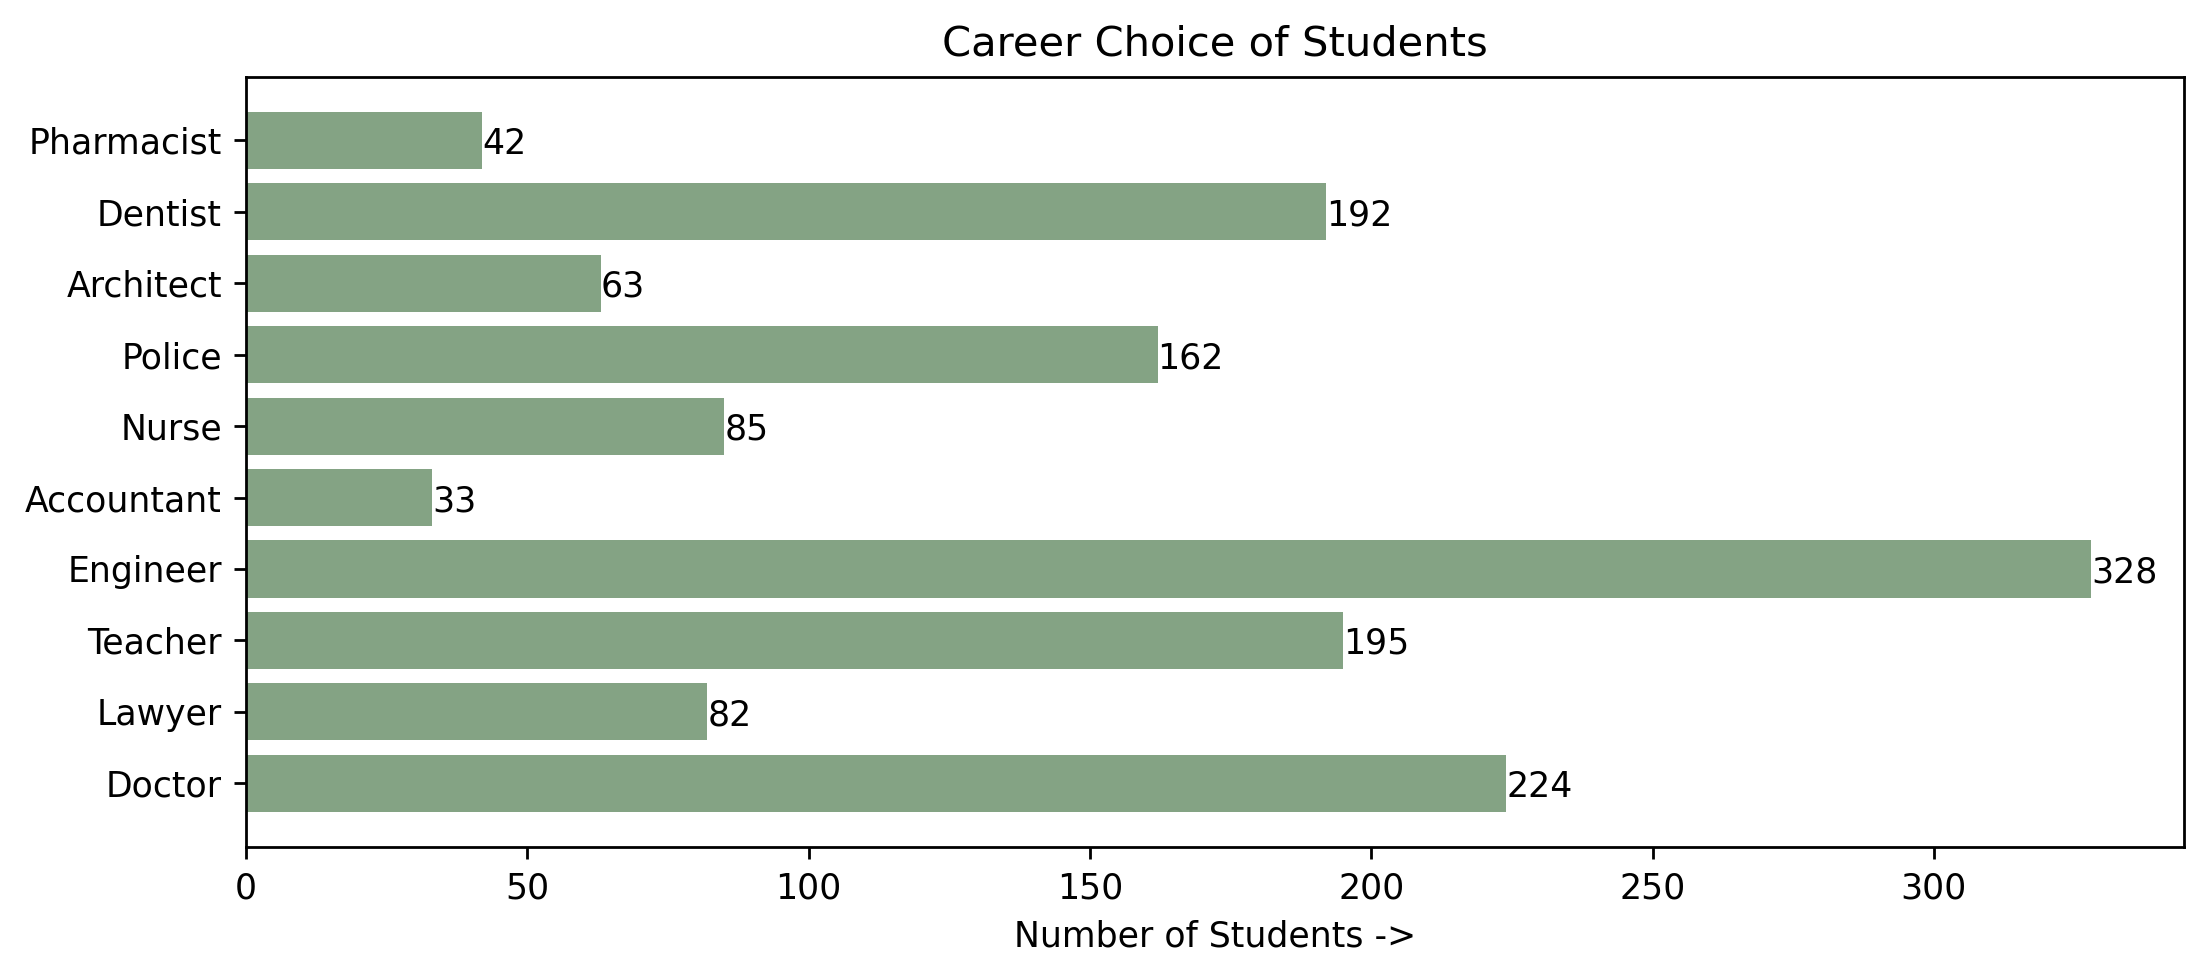

In [117]:
frequency = [g1[career] for career in jobs]

# plotting the bar graph
plt.figure(figsize=(10,4), dpi=250)

color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         )

plt.barh(jobs, frequency, align='center', color = color)

for index, value in enumerate(frequency):
    plt.text(value, index, str(value), verticalalignment='center_baseline')

plt.title('Career Choice of Students')
plt.xlabel('Number of Students ->')

plt.show()